# Scientific visualisation: 

This notebook shows some ways to carry out scientific visualisation:

### 1. The pyvista library:

Documentation: https://docs.pyvista.org/

Installation:
conda install -c conda-forge pyvista

pip install pyvista

pip install ipyvtklink


### 2. Visualisation tools with a graphical interface (GUI):

VisIt (physics): https://visit-dav.github.io/visit-website/releases-as-tables/

Paraview (ingeneering): https://www.paraview.org/download/

Note: 2D and 3D visualisation, but they provide limited capability for data analysis.

### 3. The IPython + matplotlib libraries:

In [1]:
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation
import netCDF4 as ncdf
import numpy as np

In [3]:
# See how display works, it shows on the notebook an animation

#display.Image("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Yachay_Tech/Semestre5_2024/computational-physics-1/old-notes/unit-1/pelicula_turbulencia.gif")


### Moving wave:

$y = A\sin(kx-\omega t)$

In [9]:
# X vectors:
x = np.arange(-8*np.pi, +8*np.pi, 0.5)

# Time vector
t = np.arange(0, 16*np.pi, 0.5)

# Y vector
y = []

# Define the frequencies
a = 2.
k_1 = 1.
w_1 = 0.1

for i in range(len(t)):
    y.append(a*np.sin(k_1*x - w_1*i))
    
y = np.array(y)

print(x.shape, y.shape)

(101,) (101, 101)


In [10]:
%%capture

# Empty figure environment
fig, ax = plt.subplots(1, 1, figsize=(6,4))
line, = ax.plot([],[])
ax.set_xlim(-8*np.pi, 8*np.pi)
ax.set_ylim(-5., 5.)
plt.title("Travelling plane wave")

# Animation function
def animate_wave(i):
    """
    Function to create animation based on the empty fig. env.
    """
    y_i = y[i, :]
    line.set_data(x, y_i)
    return line

# Create animation
movie_wave = animation.FuncAnimation(fig, animate_wave,\
                                     frames = len(t), interval = 0.1)

In [11]:
print(type(movie_wave))

<class 'matplotlib.animation.FuncAnimation'>


In [12]:
# Visualisation

display.HTML(movie_wave.to_jshtml())


### 4. IPython + Celluloid

pip install celluloid

In [14]:
! python --version

Python 3.9.18


In [15]:
from celluloid import Camera

In [16]:
# Open the file
data_tos = ncdf.Dataset("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Shared_folder/Data_Session3/simulation_data/tos_O1_2001-2002.nc")

# Collect the data
tos = data_tos["tos"][:]

# Slice the 3D array
sea_temp = tos[0,:,:]

print(len(tos[:,0,0]))

24


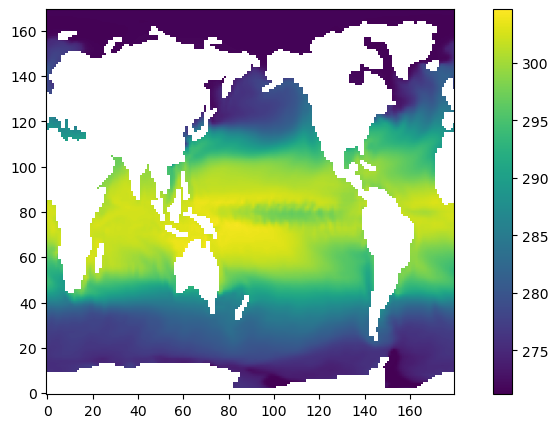

In [17]:
# Plotting

plt.figure(figsize = (10,5))

plt.imshow(sea_temp)
plt.gca().invert_yaxis()
plt.colorbar()

plt.show()

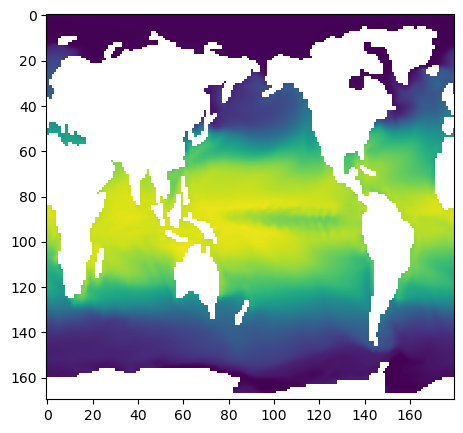

In [18]:
# Plotting for animation

fig, ax = plt.subplots(figsize=(10,5))

camera = Camera(fig)

# For loop
for i in range(0, len(tos[:,0,0])):
    ax.imshow(np.flipud(tos[i,:,:]))
    
    camera.snap()

In [19]:
# Create the animation

animation_sea_temp = camera.animate()
gif = animation_sea_temp.save("sea-temp.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


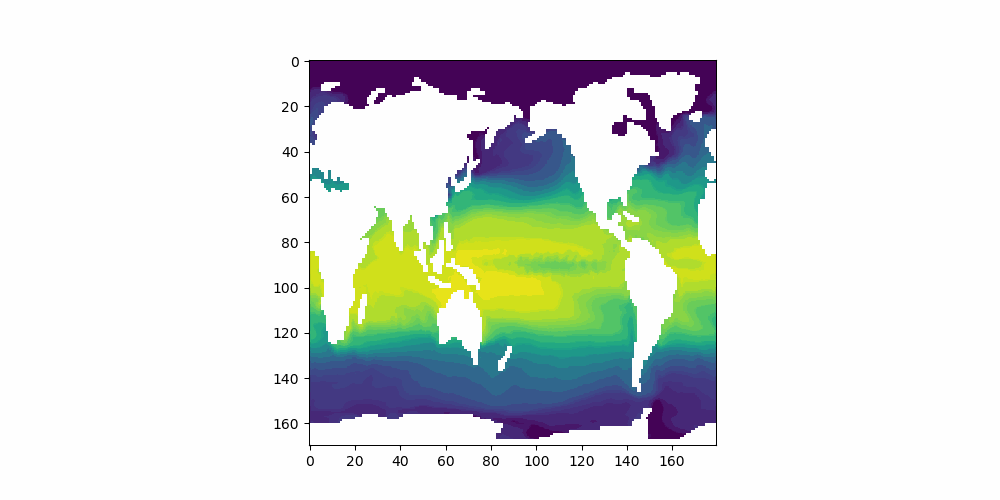

In [20]:
#display.Image(open('sea-temp.gif','rb').read())


### 5. Pillow + Glob libraries (GIF animations)

There are several ways to create animations in Python. One was consists of using pillow:

- **Pillow (PIL), see: https://pillow.readthedocs.io/en/stable/**


**conda install -c anaconda pillow**

The Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter.

This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.

The core image library is designed for fast access to data stored in a few basic pixel formats. It should provide a solid foundation for a general image processing tool.


- **Glob, see https://docs.python.org/3/library/glob.html**

The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell.

In [21]:
import os
import glob
from PIL import Image # Pillow library -> PIL

In [22]:
# Create a folder
if os.path.isdir("./Figures_new"):
    print("Directory already exists.")
else:
    print("Directory has been created.")
    os.mkdir("./Figures_new")

Directory has been created.


In [23]:
# For loop
for i in range(0, len(tos[:,0,0])):
    
    plt.figure()
    plt.imshow(np.flipud(tos[i,:,:]), clim=(270,310))
    plt.colorbar()
    plt.savefig("./Figures_new/sea-temp-pillow{:03d}.png".format(i))
    plt.close()
                      

In [24]:
# Animation:

images_input = "./Figures_new/sea-temp-pillow***.png"
imgif_output = "./Figures_new/sea-temp-pillow.gif"

# Collect the images
imgs = (Image.open(f) for f in sorted(glob.glob(images_input)))

img = next(imgs)

img.save(fp = imgif_output, format="GIF", append_images=imgs,\
        save_all=True, duration = 100, loop = 0)


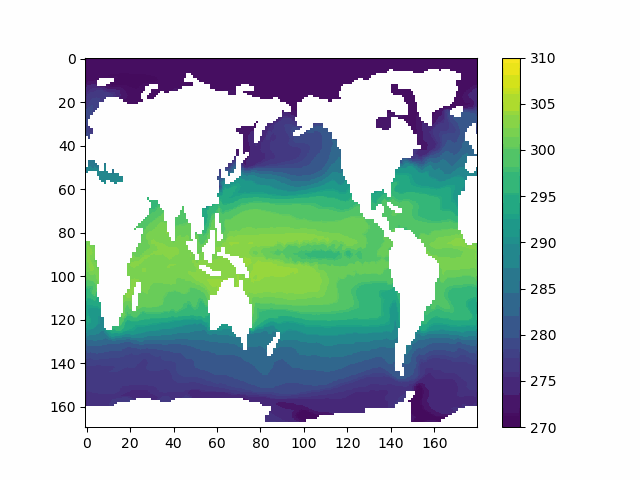

In [25]:
display.Image(open('./Figures_new/sea-temp-pillow.gif','rb').read())